In [1]:
%matplotlib inline

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# from nose.tools import *

## Linear and Logistic Regression Demo

In [3]:
housing_data = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None)
housing_data.columns = ["crime_rate", "zoned_land", "industry", "bounds_river", "nox_conc", "rooms", "age", "distance", "highways", "tax", "pt_ratio", "b_estimator", "pop_status", "price"]

housing_data

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
housing_data.corr()

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
crime_rate,1.000000,-0.300774,0.590822,0.013922,0.634679,-0.190197,0.482013,-0.495148,-0.088451,0.793392,0.362615,-0.377013,0.481907,-0.362077
zoned_land,-0.300774,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.566660,-0.119290,-0.314563,-0.391679,0.175520,-0.412995,0.360445
industry,0.590822,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.678498,-0.087615,0.720760,0.383248,-0.356977,0.603800,-0.483725
bounds_river,0.013922,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.090950,0.079105,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox_conc,0.634679,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.748872,0.009217,0.668023,0.188933,-0.380051,0.590879,-0.427321
rooms,-0.190197,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.225052,0.088753,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.482013,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.713313,0.019658,0.506456,0.261515,-0.273534,0.602339,-0.376955
distance,-0.495148,0.566660,-0.678498,-0.090950,-0.748872,0.225052,-0.713313,1.000000,0.003030,-0.541369,-0.269140,0.293621,-0.479158,0.264325
highways,-0.088451,-0.119290,-0.087615,0.079105,0.009217,0.088753,0.019658,0.003030,1.000000,-0.049221,-0.116969,0.040705,-0.069828,0.113519
tax,0.793392,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.541369,-0.049221,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [5]:
housing_data.describe()

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.696228,4.332016,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,1.999689,1.417166,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,0.585700,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.073700,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.107300,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326717,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.112625,5.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
housing_data.dtypes

crime_rate      float64
zoned_land      float64
industry        float64
bounds_river      int64
nox_conc        float64
rooms           float64
age             float64
distance        float64
highways          int64
tax             float64
pt_ratio        float64
b_estimator     float64
pop_status      float64
price           float64
dtype: object

In [7]:
housing_attributes = housing_data.drop(columns = 'price')
housing_attributes.shape

(506, 13)

In [8]:
housing_prices = housing_data.price
housing_prices.shape

(506,)

## Preprocess the data 

In [9]:
# 1. Indcator variables
housing_attributes_with_dummies = pd.get_dummies(housing_attributes)

# 2. Normalization
scaler = MinMaxScaler()
housing_attributes_scaled = scaler.fit_transform(housing_attributes_with_dummies)
housing_attributes_scaled

array([[0.        , 0.18      , 0.06781525, ..., 0.28723404, 1.        ,
        0.08967991],
       [0.00210738, 0.        , 0.24230205, ..., 0.55319149, 1.        ,
        0.2044702 ],
       [0.00210538, 0.        , 0.24230205, ..., 0.55319149, 0.98973725,
        0.06346578],
       ...,
       [0.00546574, 0.        , 0.42045455, ..., 0.89361702, 1.        ,
        0.10789183],
       [0.01036824, 0.        , 0.42045455, ..., 0.89361702, 0.99130062,
        0.13107064],
       [0.00412541, 0.        , 0.42045455, ..., 0.89361702, 1.        ,
        0.16970199]])

## Linear Regression

#### Predict continuous values… and torture first-semester students

* Regression – predicting a continuous variable
* Problem statement
    * Given pairs of (𝑥; 𝑦) points, create a model
    * Input 𝑥, output 𝑦; goal: predict 𝑦 given 𝑥
    * Under the assumption that 𝑦 depends linearly on 𝑥 (and nothing else)
* Modelling function
    $$y = \alpha x + \beta$$
    *  Many samples: for each sample ( 𝑥1, 𝑦1 ) , … , ( 𝑥𝑛, 𝑦𝑛 ) :
    $$y_i = \alpha x_i + \beta, \quad i \in [1; n]$$
    * Many variables:
    1. Linear combination (summation)
    $$y = \alpha_1 x_1 + \alpha_2 x_2 + \cdots + \alpha_n x_n + b$$
    2. Matrix form
    $$y = \alpha^T \cdot x + b$$





In [89]:
linear_regression = LinearRegression()
linear_regression.fit(housing_attributes_scaled, housing_prices)

LinearRegression()

In [12]:
linear_regression.coef_

array([  2.08448854,   1.49403979,   0.34690497,   3.00565375,
        -7.54441381,  22.43940145,   0.27658754,  -9.35981793,
         1.35281035,  -1.26826011,  -9.07603108,   3.74177288,
       -19.03479847])

```
prediction = 2.08448854 * crime_rate + 1.49403979 * zoned_land + 0.34690497 * industry + ...
```

In [13]:
linear_regression.intercept_

23.689291534676972

In [14]:
linear_regression.score(housing_attributes_scaled, housing_prices)

0.7198065414937174

In [18]:
predictions = linear_regression.predict(housing_attributes_scaled)
np.sqrt(mean_squared_error(housing_prices, predictions))

4.86351800705635

## RANSAC Regressor

In [32]:
ransac = RANSACRegressor(
    # base_estimator=LinearRegression(),
    estimator=LinearRegression(),
    max_trials=200,
    min_samples=0.25
)

In [33]:
ransac.fit(housing_attributes_scaled, housing_prices)

RANSACRegressor(estimator=LinearRegression(), max_trials=200, min_samples=0.25)

In [34]:
ransac.estimator_.coef_

array([-0.54927218,  0.77582399,  0.76485666,  1.30032858, -2.58865718,
       37.72155944, -4.19744957, -6.31705744,  1.98054523, -3.06172537,
       -6.96564492,  6.93247231, -5.86632091])

In [35]:
ransac.inlier_mask_

array([False,  True,  True, False, False, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [36]:
ransac.inlier_mask_.sum()

380

In [40]:
inliers = housing_data[ransac.inlier_mask_]
inliers

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9


In [42]:
outliers = housing_data[~ransac.inlier_mask_]
outliers

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,3.07510,0.0,18.10,0,0.580,5.713,56.7,2.8237,4,666.0,20.2,396.90,14.76,20.1
473,4.64689,0.0,18.10,0,0.614,6.980,67.6,2.5329,4,666.0,20.2,374.68,11.66,29.8
483,2.81838,0.0,18.10,0,0.532,5.762,40.3,4.0983,4,666.0,20.2,392.92,10.42,21.8
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14,19.7


Text(0, 0.5, 'Price')

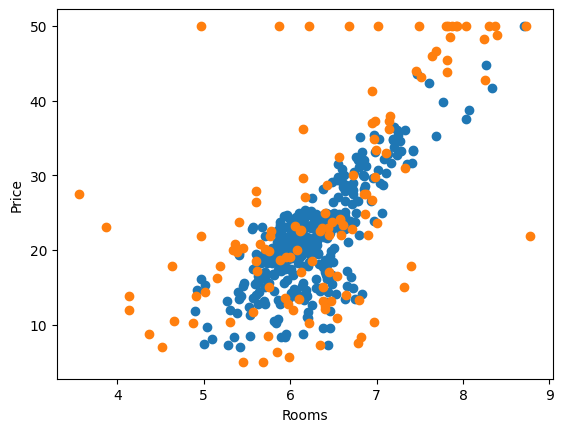

In [53]:
plt.scatter(inliers.rooms, inliers.price, label = "inliers")
plt.scatter(outliers.rooms, outliers.price, label = "ouliers")
plt.xlabel("Rooms")
plt.ylabel("Price")

In [49]:
ransac.score(housing_attributes_scaled, housing_prices)

0.6606131780073229

In [54]:
ransac.score(housing_attributes_scaled[ransac.inlier_mask_], housing_prices[ransac.inlier_mask_])

0.9227686480095327

## Polynomial Features

In [62]:
polynomial_features = PolynomialFeatures(degree=3, interaction_only=True)
housing_attributes_scaled_cubed = polynomial_features.fit_transform(housing_attributes_scaled)

In [63]:
polynomial_regression = LinearRegression()
polynomial_regression.fit(housing_attributes_scaled_cubed, housing_prices)

LinearRegression()

In [64]:
polynomial_regression.score(housing_attributes_scaled_cubed, housing_prices)

0.9670149330696448

## Logistic Regression - Classification

In [67]:
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "iris_type"]

iris_data

,sepal_length,sepal_width,petal_length,petal_width,iris_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [68]:
iris_attributes = iris_data.drop(columns = "iris_type")
iris_types = iris_data.iris_type

In [74]:
scaler = MinMaxScaler()
iris_attributes_scaled = scaler.fit_transform(iris_attributes)

In [83]:
logistic_regression = LogisticRegression(C = 9999)

In [84]:
logistic_regression.fit(iris_attributes_scaled, iris_types)

LogisticRegression(C=9999)

In [85]:
logistic_regression.coef_

array([[-15.96578867,  25.72387303, -33.17450618, -33.55010296],
       [ 11.6901407 ,  -5.19330226,  -7.52842931,  -3.79640617],
       [  4.27564798, -20.53057078,  40.70293549,  37.34650913]])

In [86]:
logistic_regression.predict(iris_attributes_scaled)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [87]:
logistic_regression.score(iris_attributes_scaled, iris_types)

0.9866666666666667

In [88]:
logistic_regression.predict_proba(iris_attributes_scaled[:10])

array([[9.99999998e-01, 1.94023084e-09, 1.07098919e-33],
       [9.99999738e-01, 2.61764268e-07, 5.32623902e-30],
       [9.99999997e-01, 2.77289959e-09, 1.04769712e-32],
       [9.99999989e-01, 1.11255856e-08, 5.01952776e-31],
       [1.00000000e+00, 2.48173063e-10, 8.88373670e-35],
       [9.99999995e-01, 4.94371821e-09, 4.08875743e-32],
       [9.99999999e-01, 5.21867611e-10, 8.48725862e-33],
       [9.99999995e-01, 5.04038061e-09, 1.46691858e-32],
       [9.99999980e-01, 2.03801000e-08, 2.20032143e-30],
       [9.99999968e-01, 3.22710601e-08, 1.41353933e-31]])

In [82]:
logistic_regression = LogisticRegression(C = 0.00001)
logistic_regression.fit(iris_attributes_scaled, iris_types)
logistic_regression.score(iris_attributes_scaled, iris_types)

0.35333333333333333